In [1]:
import numpy as np
import torch
import torchvision
from torchvision import datasets, transforms, models
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from PIL import Image
from sklearn import datasets

#### 1- Using a Custom Dataset

In [2]:
class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        label = self.labels[idx]
        return sample, label

# Example data
data = torch.randn(100, 5)  # 100 samples, 5 features each
labels = torch.randint(0, 2, (100,))  # Binary labels for each sample

# Create the custom dataset
dataset = CustomDataset(data, labels)

# Create the DataLoader
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=0)
# num_workers: Number of subprocesses to use for data loading. 0 means that the data will be loaded in the main process

#look at one random batch (4 samples)
dataiter = iter(dataloader)
data = next(dataiter)
features, labels = data
print(features, labels)

tensor([[ 0.6610, -0.3343,  1.7023,  0.6029, -1.7085],
        [ 0.7067, -0.9217, -0.4073,  1.2935,  1.0678],
        [-0.4158, -2.5616,  0.8022, -0.7147, -0.1962],
        [ 0.4616,  1.0575, -2.1235,  1.2698,  1.7089]]) tensor([0, 0, 0, 1])


#### 2- Using a downloaded dataset

In [3]:
train_dataset = torchvision.datasets.MNIST(root='mnist_data/', 
                                           train=True, 
                                           transform=torchvision.transforms.ToTensor(),  
                                           download=True)

train_loader = DataLoader(dataset=train_dataset, 
                                           batch_size=4, 
                                           shuffle=True)

# look at one random batch (4 samples)
dataiter = iter(train_loader)
data = next(dataiter)
inputs, targets = data
print(inputs.shape, targets.shape)

torch.Size([4, 1, 28, 28]) torch.Size([4])


## PyTorch Transforms

Transforms can be applied to PIL images, tensors, ndarrays, or custom data during the creation of the Dataset. These transforms help in preprocessing and augmenting the data to enhance the training process.

### Complete List of Built-in Transforms
For a comprehensive list of all built-in transforms, refer to the official PyTorch documentation:
[torchvision.transforms](https://pytorch.org/docs/stable/torchvision/transforms.html)

### On Images
The following transforms can be applied to images:

- `CenterCrop`: Crops the center of the image.
- `Grayscale`: Converts the image to grayscale.
- `Pad`: Pads the image with a specified value.
- `RandomAffine`: Applies random affine transformations.
- `RandomCrop`: Randomly crops the image.
- `RandomHorizontalFlip`: Randomly flips the image horizontally.
- `RandomRotation`: Randomly rotates the image.
- `Resize`: Resizes the image.
- `Scale`: Scales the image.

### On Tensors
The following transforms can be applied to tensors:

- `LinearTransformation`: Applies a linear transformation to the tensor.
- `Normalize`: Normalizes the tensor with mean and standard deviation.
- `RandomErasing`: Randomly erases a portion of the tensor.

### Conversion
Conversion transforms help in converting between different data types:

- `ToPILImage`: Converts a tensor or ndarray to a PIL image.
- `ToTensor`: Converts a numpy.ndarray or PIL image to a tensor.

### Generic
For more generic transformations, you can use:

- `Lambda`: Apply any user-defined lambda function.

### Custom
You can also write your own custom transform by defining a class:

```python
class CustomTransform:
    def __call__(self, sample):
        # Apply transformation
        return sample


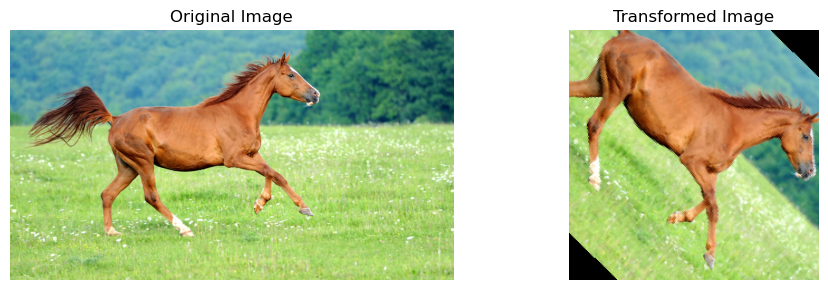

In [4]:
# Define a transformation pipeline
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomRotation(45),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load an image
image = Image.open('images/horse.png').convert('RGB') 

# Apply the transformation
transformed_image = transform(image)

# Convert the transformed image back to a format suitable for visualization
transformed_image_np = transformed_image.permute(1, 2, 0).numpy()  # Convert tensor to numpy for visualization
# PyTorch tensors representing images typically have the shape (C, H, W),
# where C is the number of channels, H is the height, and W is the width.
# permute(1, 2, 0) reorders the dimensions of the tensor from (C, H, W) to (H, W, C).

transformed_image_np = transformed_image_np * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]  # Unnormalize for display
transformed_image_np = np.clip(transformed_image_np, 0, 1)

# Plot the original and transformed images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(transformed_image_np)
axes[1].set_title('Transformed Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()